In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("liver_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
ABCA5,0.056234,0.007182,0.016045,0.014620,0.243083,0.044001,0.062608,0.035263,0.071584,0.193514,...,0.565597,1.735522,2.163499,2.117695,0.056584,1.959770,1.914565,2.684819,1.761285,3.602884
ABHD11,0.018263,0.340513,0.890299,0.466574,0.348207,0.142382,0.094959,0.105880,0.276472,0.049174,...,2.604071,3.716991,4.499527,6.341630,3.544733,4.361768,4.699330,4.130931,6.039358,3.872829
ABHD2,0.116405,0.268107,0.200036,0.031650,0.033103,0.026910,0.078480,0.077381,0.003140,0.019778,...,3.388190,3.925050,3.699330,4.954662,4.424250,3.232661,5.579542,4.564988,5.003602,4.137504
ABL1,0.140990,0.037457,0.013804,0.033141,0.038988,0.369726,0.030876,0.045682,0.011350,0.026241,...,4.084064,5.264536,4.421560,4.858478,6.607182,4.311794,3.855990,5.281327,3.840967,5.545351
ABL1,0.140990,0.037457,0.013804,0.033141,0.038988,0.369726,0.030876,0.045682,0.011350,0.026241,...,4.084064,5.264536,4.421560,4.858478,6.607182,4.311794,3.855990,5.281327,3.840967,5.545351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,0.017374,0.030757,0.031110,0.056030,0.073800,0.087961,0.077748,0.129336,0.047205,0.014985,...,2.214125,0.650765,1.389567,3.008989,0.028569,0.097611,0.000000,1.560715,2.140779,3.257011
ZNF708,0.062490,0.018045,0.220300,0.031664,0.016184,0.038199,0.071495,0.036997,0.001073,0.027757,...,3.407353,1.389567,2.990955,2.339137,1.735522,3.454176,3.754888,1.084064,2.035624,2.689299
ZNF829,0.507594,0.030491,0.008762,0.013934,0.033136,0.031007,0.052977,0.281235,0.001569,0.090657,...,2.066950,0.263034,1.505891,1.389567,0.000000,0.124328,0.084064,0.321928,0.992768,1.304511
ZW10,0.555867,0.007427,0.071035,0.213754,0.169463,0.163544,0.128432,0.947852,0.130615,0.174493,...,4.118526,2.247928,5.005400,4.213347,4.361768,4.418190,3.349082,4.179511,3.889474,4.536675


ABCA5     False
ABHD11    False
ABHD2     False
ABL1       True
ABL1       True
          ...  
ZNF606    False
ZNF708    False
ZNF829    False
ZW10      False
ZW10      False
Name: label, Length: 768, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.80943768 0.01168353 0.01029823 0.00928647 0.00734167 0.00673281
 0.00582183 0.00456114]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.84955144 0.00939059 0.00759537 0.00737585 0.00472253 0.00446916
 0.00392118 0.00368736]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.77748009 0.03308899 0.02462447 0.01384411 0.00730882 0.0061401
 0.00518632 0.00476601]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(768, 24)


(304, 24)
(304,)
149


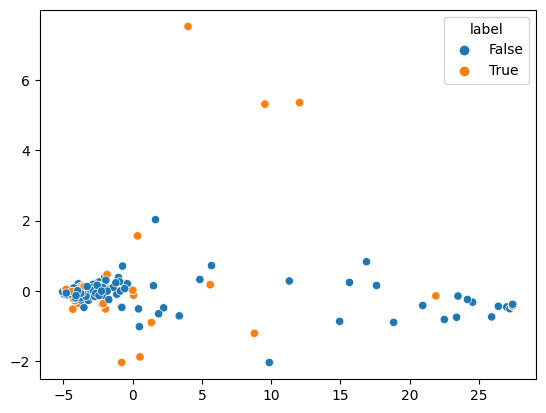

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.6195652173913043
Precision:0.6571428571428571
Recall:0.5


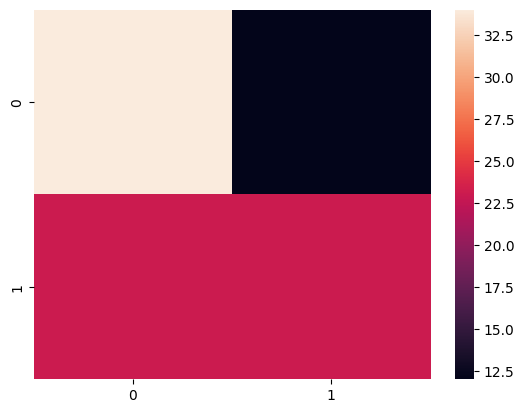

[[34 12]
 [23 23]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
7/7 [==============================] - 3s 172ms/step - loss: 3.6662 - accuracy: 0.3538 - val_loss: 2.1499 - val_accuracy: 0.5109
Epoch 2/5
7/7 [==============================] - 0s 34ms/step - loss: 1.7927 - accuracy: 0.4575 - val_loss: 1.7053 - val_accuracy: 0.4891
Epoch 3/5
7/7 [==============================] - 0s 63ms/step - loss: 1.4200 - accuracy: 0.5000 - val_loss: 1.4805 - val_accuracy: 0.5109
Epoch 4/5
7/7 [==============================] - 0s 79ms/step - loss: 1.0687 - accuracy: 0.5566 - val_loss: 1.2329 - val_accuracy: 0.5543
Epoch 5/5
7/7 [==============================] - 0s 49ms/step - loss: 0.9894 - accuracy: 0.5566 - val_loss: 1.5267 - val_accuracy: 0.5217


Text(0, 0.5, 'Loss')

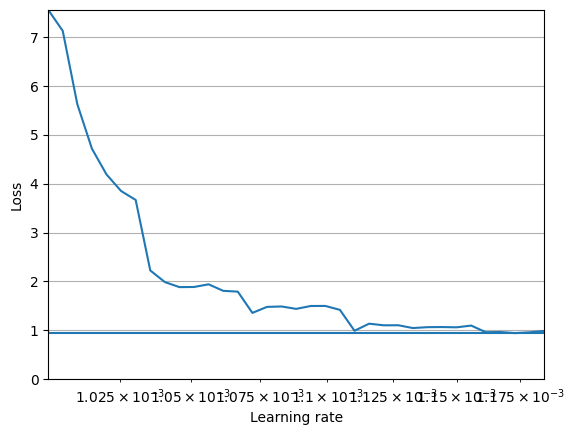

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 0.944497287273407
Best learning rate: 0.0011730432


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "livertypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\livertypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("livertypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
7/7 [==============================] - 3s 173ms/step - loss: 4.4152 - accuracy: 0.2311 - val_loss: 2.6102 - val_accuracy: 0.3696
Epoch 2/200
7/7 [==============================] - 0s 64ms/step - loss: 1.7054 - accuracy: 0.3868 - val_loss: 1.8390 - val_accuracy: 0.4783
Epoch 3/200
7/7 [==============================] - 0s 41ms/step - loss: 1.2903 - accuracy: 0.4858 - val_loss: 1.6085 - val_accuracy: 0.5109
Epoch 4/200
7/7 [==============================] - 0s 57ms/step - loss: 1.1066 - accuracy: 0.5283 - val_loss: 1.4068 - val_accuracy: 0.4891
Epoch 5/200
7/7 [==============================] - 0s 49ms/step - loss: 1.0325 - accuracy: 0.5425 - val_loss: 1.3997 - val_accuracy: 0.5109
Epoch 6/200
7/7 [==============================] - 0s 49ms/step - loss: 0.9232 - accuracy: 0.5849 - val_loss: 1.2293 - val_accuracy: 0.5543
Epoch 7/200
7/7 [==============================] - 0s 63ms/step - loss: 0.8717 - accuracy: 0.5896 - val_loss: 1.1266 - val_accuracy: 0.5435
Epoch 8/200
7/7 [==

In [24]:
model = keras.models.load_model("livertypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.9245


[0.26927241683006287, 0.9245283007621765]

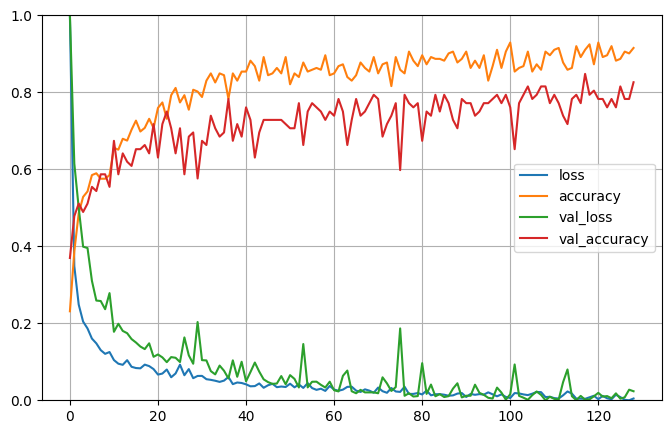

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()